In [16]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from   scipy.optimize import curve_fit 
import re


# ------------------------------------------------------------------
def extract_numbers_with_pandas(input_csv, output_csv=None):
    """
    Извлекает пары чисел из строк формата "X run: Y ticks per frame" в CSV-файле с помощью pandas.
    
    :param input_csv: Путь к входному CSV-файлу.
    :param output_csv: Путь к выходному CSV-файлу (если None, результат выводится в консоль).
    """
    df = pd.read_csv(input_csv, header=None)
    
    pattern = re.compile(r'(\d+)\s*run:\s*(\d+)\s*ticks per frame')
    
    extracted_data = []
    for cell in df.values.flatten():
        if isinstance(cell, str):
            match = pattern.search(cell)
            if match:
                run = int(match.group(1))
                ticks = int(match.group(2))
                extracted_data.append({'runs': run, 'ticks': ticks})
    
    result_df = pd.DataFrame(extracted_data)

    if output_csv:
        result_df.to_csv(output_csv, index=False)
        print(f"Результат сохранен в {output_csv}")
    else:
        print("Извлеченные данные:")
        print(result_df)

#Пример использования         
input_csv = 'tests2/test0-no-graphic.csv'  
output_csv = 'tests2/test0.csv'  
extract_numbers_with_pandas(input_csv, output_csv)
# ------------------------------------------------------------------

Результат сохранен в tests2/test0.csv


Все графики вместе


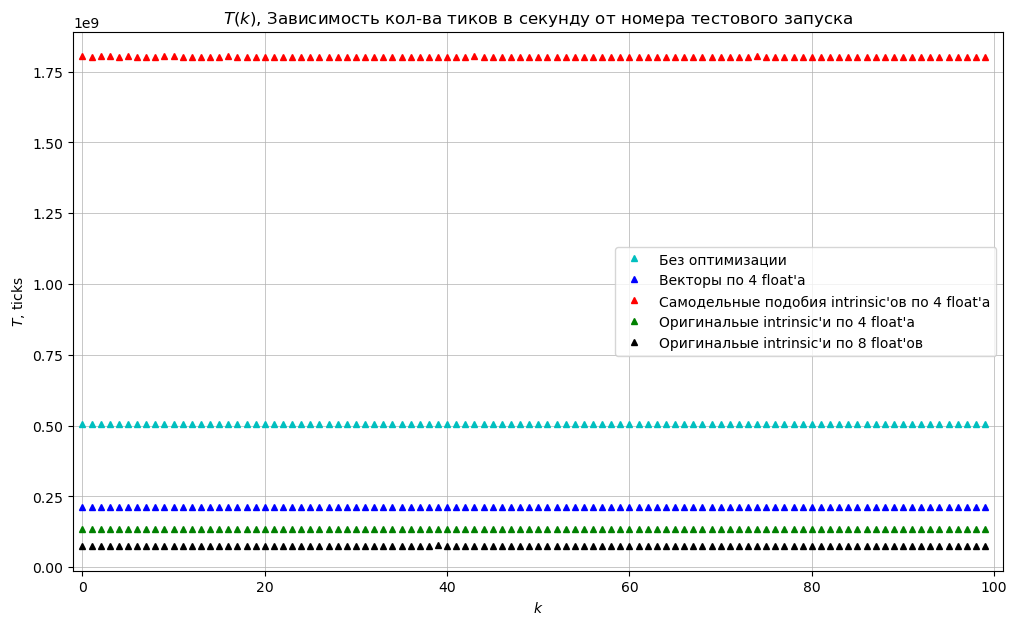

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from   scipy.optimize import curve_fit 

data0 = pd.read_csv("tests2/test0.csv", sep=",")
data1 = pd.read_csv("tests2/test1.csv", sep=",")
data2 = pd.read_csv("tests2/test2.csv", sep=",")
data3 = pd.read_csv("tests2/test3.csv", sep=",")
data4 = pd.read_csv("tests2/test4.csv", sep=",")

x0 = data0['runs']
y0 = data0['ticks']

x1 = data1['runs']
y1 = data1['ticks']

x2 = data2['runs']
y2 = data2['ticks']

x3 = data3['runs']
y3 = data3['ticks']

x4 = data4['runs']
y4 = data4['ticks']


#---------------------------------------------------------
plot_all = plt.figure( figsize = (12, 7) )
#---------------------------------------------------------

plt.plot(x0, y0, '^c', markersize=4, label='Без оптимизации' )
z_0 = np.polyfit(x0, y0, deg=1)
polynom_1 = np.poly1d(z_0)

plt.plot(x1, y1, '^b', markersize=4, label='Векторы по 4 float\'a' )
z_1 = np.polyfit(x1, y1, deg=1)
polynom_1 = np.poly1d(z_1)

plt.plot(x2, y2, '^r', markersize=4, label='Самодельные подобия intrinsic\'ов по 4 float\'a' )
z_2 = np.polyfit(x2, y2, deg=1)
polynom_2 = np.poly1d(z_2)

plt.plot(x3, y3, '^g', markersize=4, label='Оригинальые intrinsic\'и по 4 float\'a' )
z_3 = np.polyfit(x3, y3, deg=1)
polynom_3 = np.poly1d(z_3)

plt.plot(x4, y4, '^k', markersize=4, label='Оригинальые intrinsic\'и по 8 float\'ов' )
z_4 = np.polyfit(x4, y4, deg=1)
polynom_4 = np.poly1d(z_4)

#-------------------------------------------------------------
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.title(r"$ T(k) $, Зависимость кол-ва тиков в секунду от номера тестового запуска")
plt.ylabel(r"$T$, ticks")
plt.xlabel(r"$k$")

plt.xlim(-1, 101)  
# plt.ylim(4e8, 6e8)  

plt.legend()
plt.savefig("graphs/all.png")
plt.show()  
#-------------------------------------------------------------

0. Без Оптимизаций


Среднее
505251147.7659575
После фильтрации выбросов:
Среднее значение T = 5.0524e+08 tics
Стандартное отклонение = 3.1430e+04 tics
Относительная погрешность = 6.2207e-03


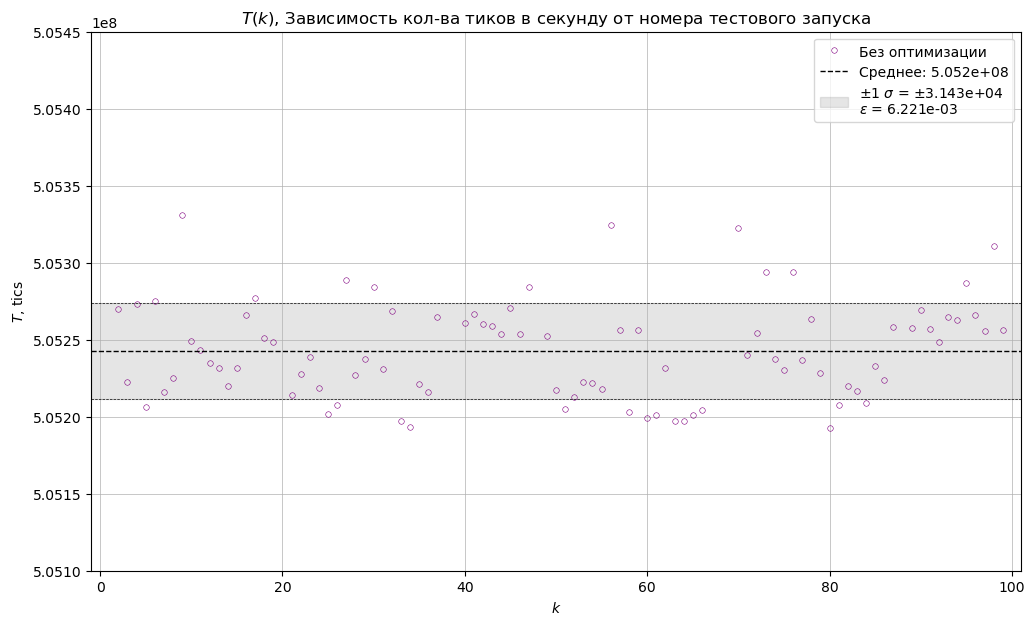

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data0 = pd.read_csv("tests2/test0.csv", sep=",")
x0 = data0['runs']
y0 = data0['ticks'] 

#------------------------------------------------------
def filter_by_distance(x, y, y_max):
    """
    Фильтрует точки, где значение больше чем на distance.
    """
    mask = (y <= y_max)
    return x[mask].values, y[mask].values
#------------------------------------------------------

#------------------------------------------------------
def filter_outliers(x, y, threshold=2):
    """
    Фильтрует выбросы на основе z-score.
    threshold - пороговое значение для определения выбросов (обычно 2-3).
    """
    z_scores = np.abs(stats.zscore(y))
    filtered_idx = z_scores < threshold
    return x[filtered_idx], y[filtered_idx]
#------------------------------------------------------

max_value = 5.0554e8
x0_normal, y0_normal = filter_by_distance(x0, y0, max_value)
x0_filtered, y0_filtered = filter_outliers(x0_normal, y0_normal, 2)

#------------------------------------------------------
# Расчёт среднего и стандартного отклонения
mean_y0 = np.mean(y0_normal) 
print('Среднее')
print(mean_y0)
mean_y0_filtered = np.mean(y0_filtered)  # Среднее после фильтрации
std_y0_filtered = np.std(y0_filtered)    # СКО после фильтрации
rel_y0_filtered = (( std_y0_filtered / mean_y0_filtered ) * 100 )

# Вывод результатов в консоль
print("После фильтрации выбросов:")
print(f"Среднее значение T = {mean_y0_filtered:.4e} tics")
print(f"Стандартное отклонение = {std_y0_filtered:.4e} tics")
print(f"Относительная погрешность = { rel_y0_filtered:.4e}")
#------------------------------------------------------


#------------------------------------------------------
plot_4 = plt.figure(figsize=(12, 7))

plt.plot(x0_filtered, y0_filtered, marker='o', markerfacecolor='none', markeredgecolor='purple', markeredgewidth=0.4, linestyle='', markersize=4, 
         label='Без оптимизации' )

z_0 = np.polyfit(x0_filtered, y0_filtered, deg=1)
polynom_0 = np.poly1d(z_0)
#------------------------------------------------------

plt.axhline(mean_y0_filtered, color='black', linestyle='--', linewidth=1, 
            label=f'Среднее: {mean_y0_filtered:.3e}')
plt.axhline(mean_y0_filtered + std_y0_filtered, color='black', linestyle='--', linewidth=0.5)
plt.axhline(mean_y0_filtered - std_y0_filtered, color='black', linestyle='--', linewidth=0.5)

plt.fill_between([-1,101], 
                 mean_y0_filtered - std_y0_filtered, 
                 mean_y0_filtered + std_y0_filtered, 
                 color='gray', alpha=0.2, 
                 label=f'±1 $\\sigma$ = ±{std_y0_filtered:.3e}\n' 
                 f'$\\epsilon$ = {rel_y0_filtered:.3e}')

plt.grid(True, linestyle='-', linewidth=0.5)
plt.title("$T(k)$, Зависимость кол-ва тиков в секунду от номера тестового запуска")
plt.ylabel("$T$, tics")
plt.xlabel("$k$")
plt.xlim(-1, 101)
plt.ylim(5.051e8, 5.0545e8)  

plt.legend()
plt.savefig("graphs/0.png")
plt.show()

1. Векторы по 4


Среднее
211197758.34736842
После фильтрации выбросов:
Среднее значение T = 2.1120e+08 tics
Стандартное отклонение = 1.6841e+04 tics
Относительная погрешность = 7.9742e-03


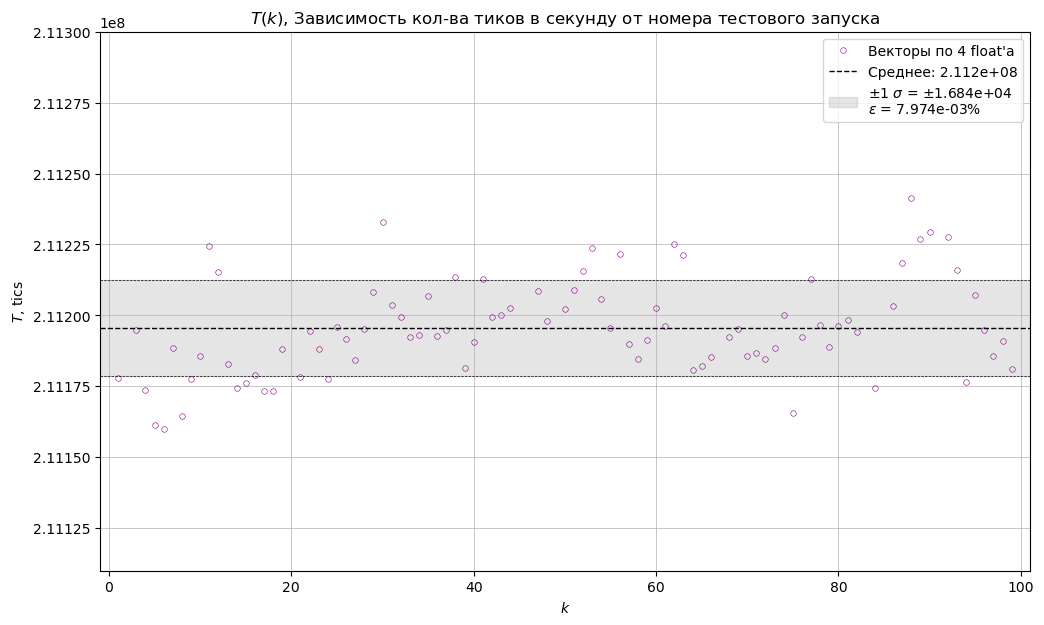

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data1 = pd.read_csv("tests2/test1.csv", sep=",")
x1 = data1['runs']
y1 = data1['ticks'] 

#------------------------------------------------------
def filter_by_distance(x, y, y_max):
    """
    Фильтрует точки, где значение больше чем на distance.
    """
    mask = (y <= y_max)
    return x[mask].values, y[mask].values
#------------------------------------------------------

#------------------------------------------------------
def filter_outliers(x, y, threshold=2):
    """
    Фильтрует выбросы на основе z-score.
    threshold - пороговое значение для определения выбросов (обычно 2-3).
    """
    z_scores = np.abs(stats.zscore(y))
    filtered_idx = z_scores < threshold
    return x[filtered_idx], y[filtered_idx]
#------------------------------------------------------

max_value = 2.1130e8
x1_normal, y1_normal = filter_by_distance(x1, y1, max_value)
x1_filtered, y1_filtered = filter_outliers(x1_normal, y1_normal, 2)

#------------------------------------------------------
# Расчёт среднего и стандартного отклонения
mean_y1 = np.mean(y1_normal) 
print('Среднее')
print(mean_y1)
mean_y1_filtered = np.mean(y1_filtered)  # Среднее после фильтрации
std_y1_filtered = np.std(y1_filtered)    # СКО после фильтрации
rel_y1_filtered = (( std_y1_filtered / mean_y1_filtered ) * 100 )

# Вывод результатов в консоль
print("После фильтрации выбросов:")
print(f"Среднее значение T = {mean_y1_filtered:.4e} tics")
print(f"Стандартное отклонение = {std_y1_filtered:.4e} tics")
print(f"Относительная погрешность = { rel_y1_filtered:.4e}")
#------------------------------------------------------


#------------------------------------------------------
plot_1 = plt.figure(figsize=(12, 7))

plt.plot(x1_filtered, y1_filtered, marker='o', markerfacecolor='none', markeredgecolor='purple', markeredgewidth=0.4, linestyle='', markersize=4, 
         label='Векторы по 4 float\'a' )

z_1 = np.polyfit(x1_filtered, y1_filtered, deg=1)
polynom_1 = np.poly1d(z_1)
#------------------------------------------------------

plt.axhline(mean_y1_filtered, color='black', linestyle='--', linewidth=1, 
            label=f'Среднее: {mean_y1_filtered:.3e}')
plt.axhline(mean_y1_filtered + std_y1_filtered, color='black', linestyle='--', linewidth=0.5)
plt.axhline(mean_y1_filtered - std_y1_filtered, color='black', linestyle='--', linewidth=0.5)

plt.fill_between([-1,101], 
                 mean_y1_filtered - std_y1_filtered, 
                 mean_y1_filtered + std_y1_filtered, 
                 color='gray', alpha=0.2, 
                 label=f'±1 $\\sigma$ = ±{std_y1_filtered:.3e}\n' 
                 f'$\\epsilon$ = {rel_y1_filtered:.3e}%')

plt.grid(True, linestyle='-', linewidth=0.5)
plt.title("$T(k)$, Зависимость кол-ва тиков в секунду от номера тестового запуска")
plt.ylabel("$T$, tics")
plt.xlabel("$k$")
plt.xlim(-1, 101)
plt.ylim(2.1111e8, 2.1130e8)  

plt.legend()
plt.savefig("graphs/1.png")
plt.show()


2. Самодельные интринсики по 4


Среднее
1802470124.88
После фильтрации выбросов:
Среднее значение T = 1.8024e+09 tics
Стандартное отклонение = 5.9432e+05 tics
Относительная погрешность = 3.2974e-02


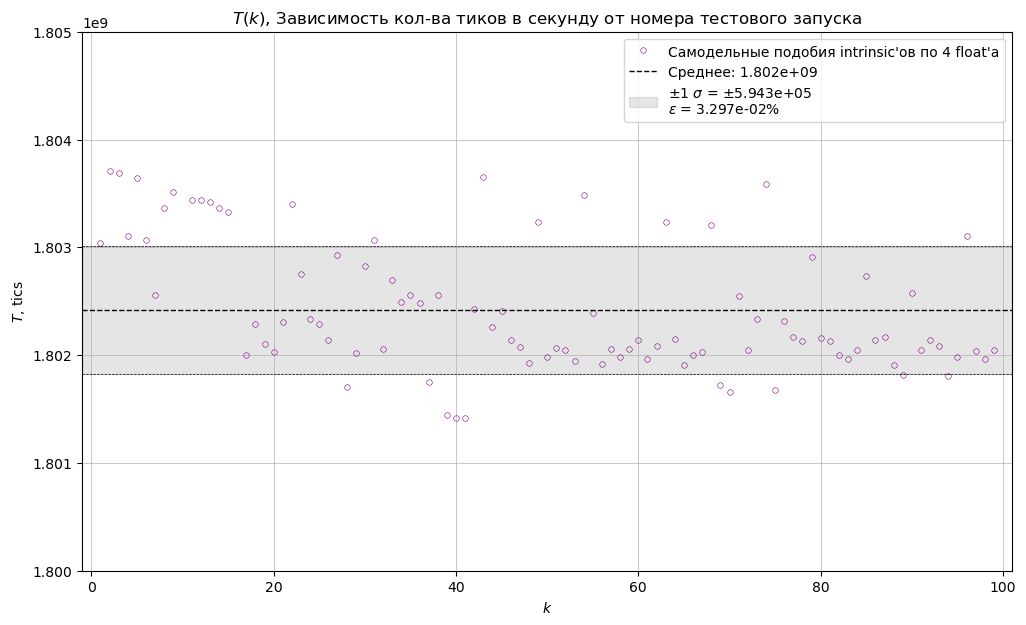

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data2 = pd.read_csv("tests2/test2.csv", sep=",")
x2 = data2['runs']
y2 = data2['ticks'] 

#------------------------------------------------------
def filter_by_distance(x, y, y_max):
    """
    Фильтрует точки, где значение больше чем на distance.
    """
    mask = (y <= y_max)
    return x[mask].values, y[mask].values
#------------------------------------------------------

#------------------------------------------------------
def filter_outliers(x, y, threshold=2):
    """
    Фильтрует выбросы на основе z-score.
    threshold - пороговое значение для определения выбросов (обычно 2-3).
    """
    z_scores = np.abs(stats.zscore(y))
    filtered_idx = z_scores < threshold
    return x[filtered_idx], y[filtered_idx]
#------------------------------------------------------

max_value = 1.81e9
x2_normal, y2_normal = filter_by_distance(x2, y2, max_value)
x2_filtered, y2_filtered = filter_outliers(x2_normal, y2_normal, 2)

#------------------------------------------------------
# Расчёт среднего и стандартного отклонения
mean_y2 = np.mean(y2_normal) 
print('Среднее')
print(mean_y2)
mean_y2_filtered = np.mean(y2_filtered)  # Среднее после фильтрации
std_y2_filtered = np.std(y2_filtered)    # СКО после фильтрации
rel_y2_filtered = (( std_y2_filtered / mean_y2_filtered ) * 100 )

# Вывод результатов в консоль
print("После фильтрации выбросов:")
print(f"Среднее значение T = {mean_y2_filtered:.4e} tics")
print(f"Стандартное отклонение = {std_y2_filtered:.4e} tics")
print(f"Относительная погрешность = { rel_y2_filtered:.4e}")
#------------------------------------------------------


#------------------------------------------------------
plot_2 = plt.figure(figsize=(12, 7))

plt.plot(x2_filtered, y2_filtered, marker='o', markerfacecolor='none', markeredgecolor='purple', markeredgewidth=0.4, linestyle='', markersize=4, 
         label='Самодельные подобия intrinsic\'ов по 4 float\'a' )

z_2 = np.polyfit(x2_filtered, y2_filtered, deg=1)
polynom_2 = np.poly1d(z_2)
#------------------------------------------------------

plt.axhline(mean_y2_filtered, color='black', linestyle='--', linewidth=1, 
            label=f'Среднее: {mean_y2_filtered:.3e}')
plt.axhline(mean_y2_filtered + std_y2_filtered, color='black', linestyle='--', linewidth=0.5)
plt.axhline(mean_y2_filtered - std_y2_filtered, color='black', linestyle='--', linewidth=0.5)

plt.fill_between([-1,101], 
                 mean_y2_filtered - std_y2_filtered, 
                 mean_y2_filtered + std_y2_filtered, 
                 color='gray', alpha=0.2, 
                 label=f'±1 $\\sigma$ = ±{std_y2_filtered:.3e}\n' 
                 f'$\\epsilon$ = {rel_y2_filtered:.3e}%')

plt.grid(True, linestyle='-', linewidth=0.5)
plt.title("$T(k)$, Зависимость кол-ва тиков в секунду от номера тестового запуска")
plt.ylabel("$T$, tics")
plt.xlabel("$k$")
plt.xlim(-1, 101)
plt.ylim(1.80e9, 1.8050e9)  

plt.legend()
plt.savefig("graphs/2.png")
plt.show()

3. Оригинальные итринсики по 4


Среднее
136046995.07142857
После фильтрации выбросов:
Среднее значение T = 1.3604e+08 tics
Стандартное отклонение = 1.5406e+04 tics
Относительная погрешность = 1.1324e-02


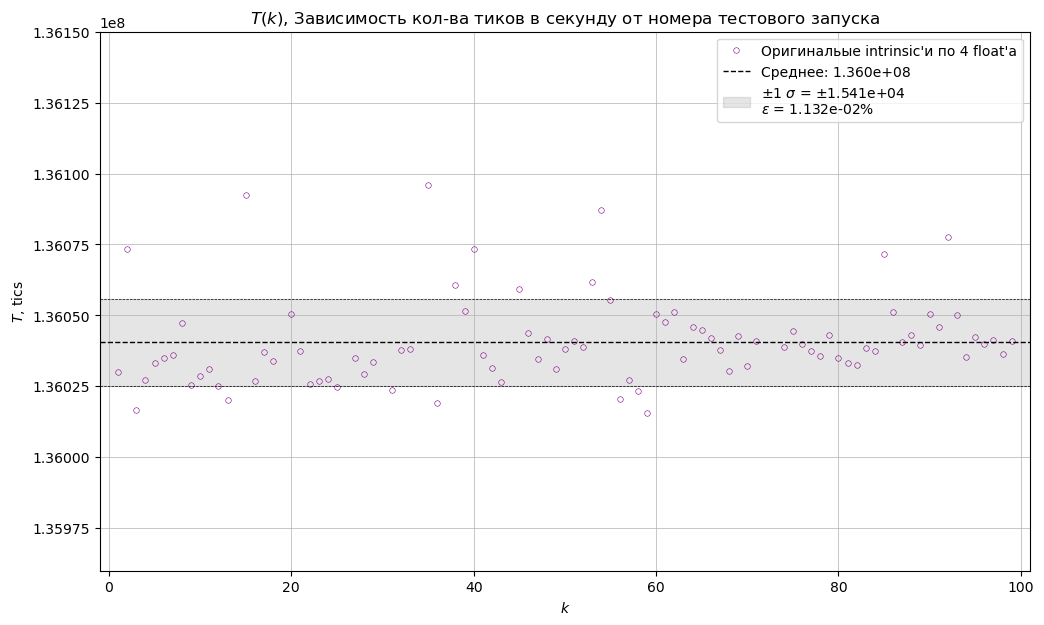

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data3 = pd.read_csv("tests2/test3.csv", sep=",")
x3 = data3['runs']
y3 = data3['ticks'] 

#------------------------------------------------------
def filter_by_distance(x, y, y_max):
    """
    Фильтрует точки, где значение больше чем на distance.
    """
    mask = (y <= y_max)
    return x[mask].values, y[mask].values
#------------------------------------------------------

#------------------------------------------------------
def filter_outliers(x, y, threshold=2):
    """
    Фильтрует выбросы на основе z-score.
    threshold - пороговое значение для определения выбросов (обычно 2-3).
    """
    z_scores = np.abs(stats.zscore(y))
    filtered_idx = z_scores < threshold
    return x[filtered_idx], y[filtered_idx]
#------------------------------------------------------

max_value = 1.362e8
x3_normal, y3_normal = filter_by_distance(x3, y3, max_value)
x3_filtered, y3_filtered = filter_outliers(x3_normal, y3_normal, 2)

#------------------------------------------------------
# Расчёт среднего и стандартного отклонения
mean_y3 = np.mean(y3_normal) 
print('Среднее')
print(mean_y3)
mean_y3_filtered = np.mean(y3_filtered)  # Среднее после фильтрации
std_y3_filtered = np.std(y3_filtered)    # СКО после фильтрации
rel_y3_filtered = (( std_y3_filtered / mean_y3_filtered ) * 100 )

# Вывод результатов в консоль
print("После фильтрации выбросов:")
print(f"Среднее значение T = {mean_y3_filtered:.4e} tics")
print(f"Стандартное отклонение = {std_y3_filtered:.4e} tics")
print(f"Относительная погрешность = { rel_y3_filtered:.4e}")
#------------------------------------------------------


#------------------------------------------------------
plot_3 = plt.figure(figsize=(12, 7))

plt.plot(x3_filtered, y3_filtered, marker='o', markerfacecolor='none', markeredgecolor='purple', markeredgewidth=0.4, linestyle='', markersize=4, 
         label='Оригинальые intrinsic\'и по 4 float\'a' )

z_3 = np.polyfit(x3_filtered, y3_filtered, deg=1)
polynom_3 = np.poly1d(z_3)
#------------------------------------------------------

plt.axhline(mean_y3_filtered, color='black', linestyle='--', linewidth=1, 
            label=f'Среднее: {mean_y3_filtered:.3e}')
plt.axhline(mean_y3_filtered + std_y3_filtered, color='black', linestyle='--', linewidth=0.5)
plt.axhline(mean_y3_filtered - std_y3_filtered, color='black', linestyle='--', linewidth=0.5)

plt.fill_between([-1,101], 
                 mean_y3_filtered - std_y3_filtered, 
                 mean_y3_filtered + std_y3_filtered, 
                 color='gray', alpha=0.2, 
                 label=f'±1 $\\sigma$ = ±{std_y3_filtered:.3e}\n' 
                 f'$\\epsilon$ = {rel_y3_filtered:.3e}%')

plt.grid(True, linestyle='-', linewidth=0.5)
plt.title("$T(k)$, Зависимость кол-ва тиков в секунду от номера тестового запуска")
plt.ylabel("$T$, tics")
plt.xlabel("$k$")
plt.xlim(-1, 101)
plt.ylim(1.3596e8, 1.3615e8)  

plt.legend()
plt.savefig("graphs/3.png")
plt.show()

4. Оригинальные интринсики по 8


Среднее
74407826.42708333
После фильтрации выбросов:
Среднее значение T = 7.4405e+07 tics
Стандартное отклонение = 1.2358e+04 tics
Относительная погрешность = 1.6610e-02


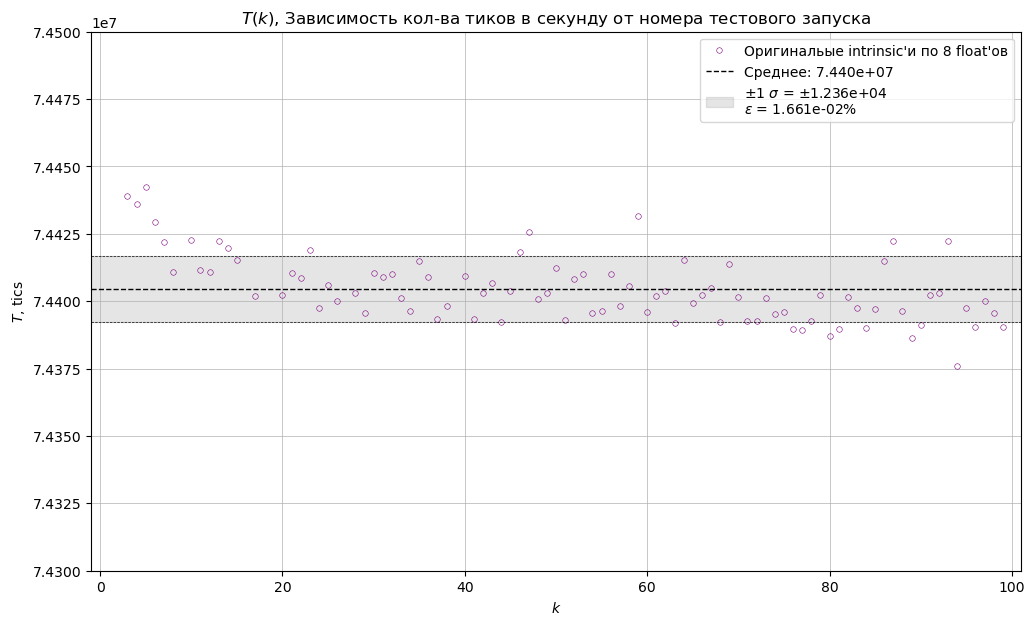

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data4 = pd.read_csv("tests2/test4.csv", sep=",")
x4 = data4['runs']
y4 = data4['ticks'] 

#------------------------------------------------------
def filter_by_distance(x, y, y_max):
    """
    Фильтрует точки, где значение больше чем на distance.
    """
    mask = (y <= y_max)
    return x[mask].values, y[mask].values
#------------------------------------------------------

#------------------------------------------------------
def filter_outliers(x, y, threshold=2):
    """
    Фильтрует выбросы на основе z-score.
    threshold - пороговое значение для определения выбросов (обычно 2-3).
    """
    z_scores = np.abs(stats.zscore(y))
    filtered_idx = z_scores < threshold
    return x[filtered_idx], y[filtered_idx]
#------------------------------------------------------

max_value = 7.5e7
x4_normal, y4_normal = filter_by_distance(x4, y4, max_value)
x4_filtered, y4_filtered = filter_outliers(x4_normal, y4_normal, 2)

#------------------------------------------------------
# Расчёт среднего и стандартного отклонения
mean_y4 = np.mean(y4_normal) 
print('Среднее')
print(mean_y4)
mean_y4_filtered = np.mean(y4_filtered)  # Среднее после фильтрации
std_y4_filtered = np.std(y4_filtered)    # СКО после фильтрации
rel_y4_filtered = (( std_y4_filtered / mean_y4_filtered ) * 100 )

# Вывод результатов в консоль
print("После фильтрации выбросов:")
print(f"Среднее значение T = {mean_y4_filtered:.4e} tics")
print(f"Стандартное отклонение = {std_y4_filtered:.4e} tics")
print(f"Относительная погрешность = { rel_y4_filtered:.4e}")
#------------------------------------------------------


#------------------------------------------------------
plot_4 = plt.figure(figsize=(12, 7))

plt.plot(x4_filtered, y4_filtered, marker='o', markerfacecolor='none', markeredgecolor='purple', markeredgewidth=0.4, linestyle='', markersize=4, 
         label='Оригинальые intrinsic\'и по 8 float\'ов' )

z_4 = np.polyfit(x4_filtered, y4_filtered, deg=1)
polynom_4 = np.poly1d(z_4)
#------------------------------------------------------

plt.axhline(mean_y4_filtered, color='black', linestyle='--', linewidth=1, 
            label=f'Среднее: {mean_y4_filtered:.3e}')
plt.axhline(mean_y4_filtered + std_y4_filtered, color='black', linestyle='--', linewidth=0.5)
plt.axhline(mean_y4_filtered - std_y4_filtered, color='black', linestyle='--', linewidth=0.5)

plt.fill_between([-1,101], 
                 mean_y4_filtered - std_y4_filtered, 
                 mean_y4_filtered + std_y4_filtered, 
                 color='gray', alpha=0.2, 
                 label=f'±1 $\\sigma$ = ±{std_y4_filtered:.3e}\n' 
                 f'$\\epsilon$ = {rel_y4_filtered:.3e}%')

plt.grid(True, linestyle='-', linewidth=0.5)
plt.title("$T(k)$, Зависимость кол-ва тиков в секунду от номера тестового запуска")
plt.ylabel("$T$, tics")
plt.xlabel("$k$")
plt.xlim(-1, 101)
plt.ylim(7.43e7, 7.45e7)  

plt.legend()
plt.savefig("graphs/4.png")
plt.show()